In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
img = cv2.imread("bible.jpeg", cv2.IMREAD_GRAYSCALE) # queryiamge

cap = cv2.VideoCapture(0)

In [3]:
# Features
sift = cv2.xfeatures2d.SIFT_create()
kp_image, desc_image = sift.detectAndCompute(img, None)

In [4]:
# Feature matching
index_params = dict(algorithm=0, trees=5)
search_params = dict()
flann = cv2.FlannBasedMatcher(index_params, search_params)

In [5]:
while True:
    _, frame = cap.read()
    grayframe = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) # trainimage

    kp_grayframe, desc_grayframe = sift.detectAndCompute(grayframe, None)
    matches = flann.knnMatch(desc_image, desc_grayframe, k=2)

    good_points = []
    for m, n in matches:
        if m.distance < 0.55*n.distance:
            good_points.append(m)

    img3 = cv2.drawMatches(img, kp_image, grayframe, kp_grayframe, good_points, grayframe)
    cv2.imshow("img3", img3)

    key = cv2.waitKey(1)
    if key == 27:
        break

cap.release()
cv2.destroyAllWindows()

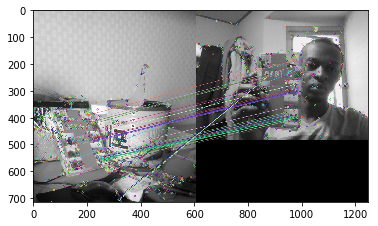

In [6]:
img = cv2.imread("Output.PNG") # queryiamge
plt.imshow(img)